In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('datasets/Salary_Data.csv')
print('Salary Data\n',df)

Salary Data
     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [8]:
# seperate the input and output variables
x = df[['YearsExperience']]
y = df['Salary']

In [9]:
x.shape

(30, 1)

In [10]:
y.shape

(30,)

In [67]:
x.corrwith(y)

YearsExperience    0.978242
dtype: float64

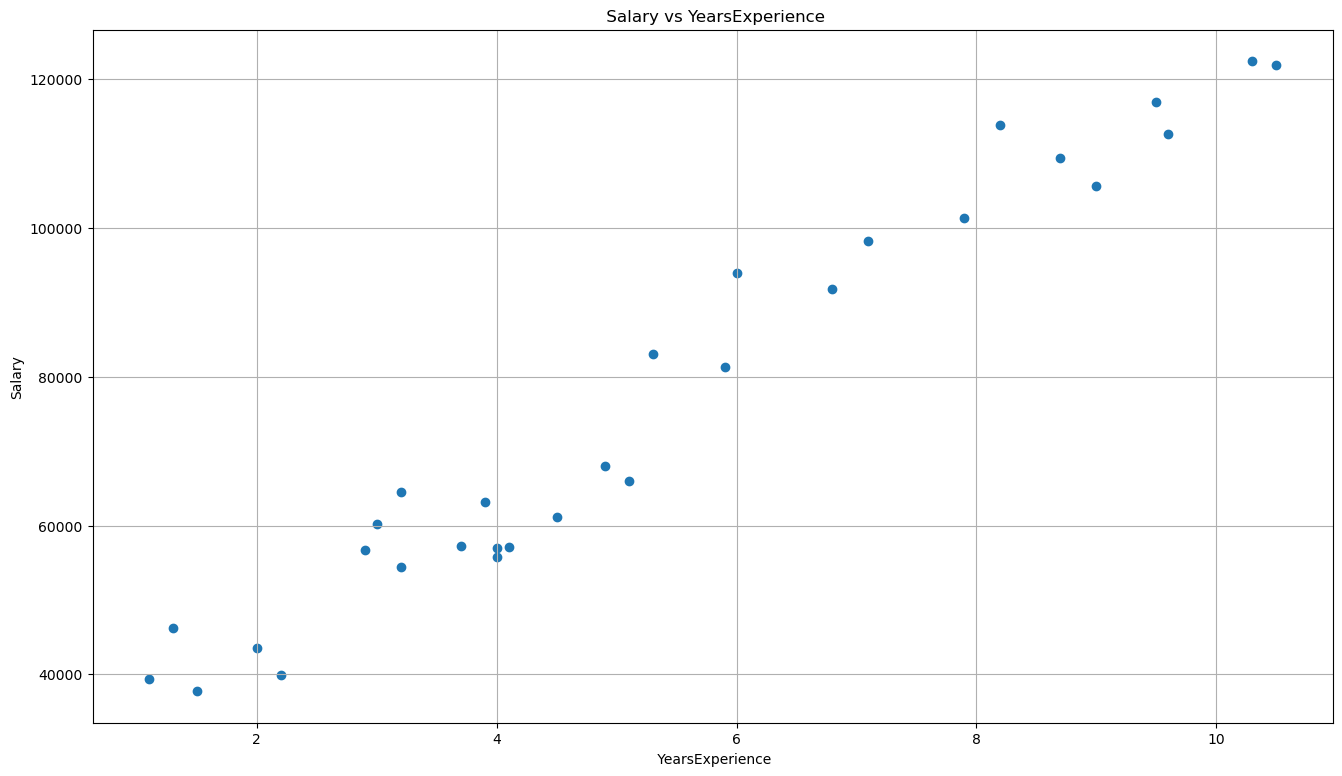

In [12]:
plt.figure(figsize = (16,9))
plt.grid()
plt.title(' Salary vs YearsExperience')
plt.xlabel(' YearsExperience')
plt.ylabel('Salary')
plt.scatter(x,y)

In [17]:
# cross validation
from sklearn.model_selection import train_test_split #import the fun
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0) #split the data 75% train and 25% test,randomstate is constant

In [18]:
x_train, x_test, y_train, y_test

(    YearsExperience
 17              5.3
 22              7.9
 5               2.9
 16              5.1
 8               3.2
 14              4.5
 23              8.2
 20              6.8
 1               1.3
 29             10.5
 6               3.0
 4               2.2
 18              5.9
 19              6.0
 9               3.7
 7               3.2
 25              9.0
 3               2.0
 0               1.1
 21              7.1
 15              4.9
 12              4.0,
     YearsExperience
 2               1.5
 28             10.3
 13              4.1
 10              3.9
 26              9.5
 24              8.7
 27              9.6
 11              4.0,
 17     83088.0
 22    101302.0
 5      56642.0
 16     66029.0
 8      64445.0
 14     61111.0
 23    113812.0
 20     91738.0
 1      46205.0
 29    121872.0
 6      60150.0
 4      39891.0
 18     81363.0
 19     93940.0
 9      57189.0
 7      54445.0
 25    105582.0
 3      43525.0
 0      39343.0
 21     98273.0
 15   

In [19]:
# build the model
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
# m value
regressor.coef_

array([9379.71049195])

In [23]:
# c value
regressor.intercept_

26986.691316737248

In [24]:
regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [25]:
regressor.predict([[10.8]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128287.56462975])

In [26]:
regressor.predict([[20.8]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([222084.66954921])

In [35]:
print('x test\n', x_test)

x test
     YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7
27              9.6
11              4.0


In [28]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

In [31]:
# predict on the test data
y_pred = regressor.predict(x_test)
print('Predicted salary\n', y_pred)

Predicted salary
 [ 41056.25705466 123597.70938378  65443.50433372  63567.56223533
 116093.94099022 108590.17259667 117031.91203942  64505.53328452]


In [32]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted': y_pred
})
result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [33]:
result = pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y': y_test,
    'y^': y_pred,
    'Error': y_pred - y_test,
    'abs(Error)':abs(y_pred - y_test)
})
result

,x,y,y^,Error,abs(Error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [49]:
# mean abs err

np.mean(abs(y_pred - y_test))

3508.5455930660555

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [50]:
#RMSE root mean square error performance prediction method

result = pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y': y_test,
    'y^': y_pred,
    'Error': y_pred - y_test,
    'Error^2':(y_pred - y_test)**2
})
result

,x,y,y^,Error,Error^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [41]:
np.sqrt(np.mean((y_pred - y_test)**2))

4733.70258289858

In [42]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

4733.70258289858

In [47]:
#R^2 error

mean_value = np.mean(y_test)
r2 = (np.sum((y_test - mean_value)**2) - np.sum((y_test - y_pred)**2))/np.sum((y_test - mean_value)**2)
r2

0.9779208335417601

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [53]:
regressor.score(x, y)

0.955975487542377

In [54]:
regressor.score(x_train, y_train)

0.9395413526983522

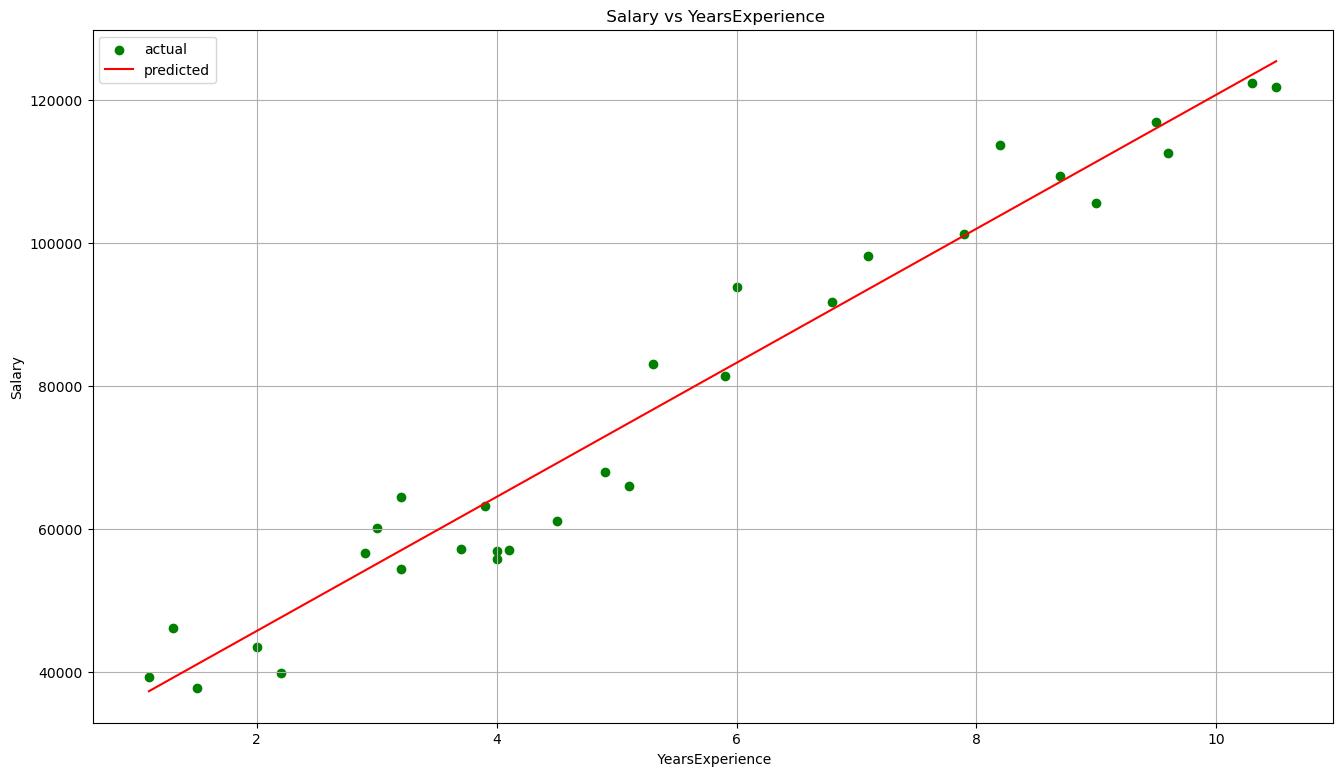

In [56]:
y_pred = regressor.predict(x)

plt.figure(figsize = (16,9))
plt.grid()
plt.title(' Salary vs YearsExperience')
plt.xlabel(' YearsExperience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'green', label = 'actual')
plt.plot(x, y_pred, color = 'red', label = 'predicted')
plt.legend()

In [65]:
y_pred = regressor.predict(x_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [66]:
exp = float(input('Enter the experience'))
exp = pd.DataFrame({'YearsExperience': [exp]})
sal= regressor.predict(exp)
print('Your expected salary can be :', sal[0])

Enter the experience 10


Your expected salary can be : 120783.7962361974
